## Import librearies

In [1]:
# ---------------------------------- Tabular --------------------------------- #
import pandas as pd

# ------------------------------- Visualization ------------------------------ #
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
# Should do that, I think ProfilReport is bodering matplotlib a bit
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 8)
import seaborn as sns

# ---------------------------- Dimension reduction --------------------------- #
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# -------------------------------- Processing -------------------------------- #
from sklearn.preprocessing import StandardScaler

Lets import csv data

In [2]:
data = pd.read_csv("data/drinking_water_potability.csv")
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690300     6.127421   307.699498   
50%       7.036752   196.967627  20927.833605     7.130299   333.073546   
75%       8.062066   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792305       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

# Overview

In [3]:
prof = ProfileReport(data)
prof.to_file(output_file='report.html')
prof.to_notebook_iframe()

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 67.12it/s]


# Dimension Reductions 

In [3]:
data_dropped_na = pd.DataFrame(data[data.isna().sum(axis = 1)==0])
y = data_dropped_na["Potability"]

X_pos = data_dropped_na[data_dropped_na.Potability == 1].drop("Potability", axis = 1)
print("Number of positive instances : ", X_pos.shape[0])
X_neg = data_dropped_na[data_dropped_na.Potability == 0].drop("Potability", axis = 1)
print("Number of negative instances : ", X_neg.shape[0])

X_all = X_pos.add(X_neg, fill_value=0)

Number of positive instances :  811
Number of negative instances :  1200


In [4]:
X_pos.describe()

ph    Hardness        Solids  Chloramines     Sulfate  \
count  811.000000  811.000000    811.000000   811.000000  811.000000   
mean     7.113791  195.908341  22344.922883     7.174395  332.457832   
std      1.437623   35.301146   8891.547966     1.732796   47.446190   
min      0.227499   73.492234   1198.943699     1.390871  129.000000   
25%      6.256039  174.380497  15816.076610     6.106169  301.768819   
50%      7.046549  197.617494  21217.158600     7.212254  331.087177   
75%      7.955161  218.414531  27696.134415     8.181431  365.632984   
max     11.898078  317.338124  56488.672410    13.127000  481.030642   

       Conductivity  Organic_carbon  Trihalomethanes   Turbidity  
count    811.000000      811.000000       811.000000  811.000000  
mean     425.005423       14.294764        66.581596    3.991254  
std       81.950982        3.257917        16.297713    0.776408  
min      201.619737        2.200000         8.577013    1.492207  
25%      360.275012       12.148355        55.751069    3.440564  
50%      421.099917       14.252684        66.612984    4.007347  
75%      482.296528       16.561121        77.372587    4.527463  
max      695.369528       23.604298       124.000000    6.494249

In [5]:
X_neg.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  1200.000000  1200.000000   1200.000000  1200.000000  1200.000000   
mean      7.067201   196.008440  21628.535122     7.107267   333.742928   
std       1.659106    30.717642   8461.108693     1.476577    36.398403   
min       1.431782    98.452931    320.942611     2.456014   203.444521   
25%       5.982888   177.313440  15378.907322     6.169384   310.653441   
50%       6.992004   196.799368  20507.399645     7.103718   332.615625   
75%       8.141979   214.532109  26786.546215     8.076759   356.432048   
max      14.000000   300.292476  55334.702800    12.653362   460.107069   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  
count   1200.000000     1200.000000      1200.000000  1200.000000  
mean     427.554342       14.400250        66.278712     3.955181  
std       79.882677        3.370196        15.931953     0.782984  
min      210.319182        4.371899        14.343161     1.450000  
25%      369.580980       12.118659        56.152070     3.444706  
50%      424.479471       14.351828        66.206116     3.944085  
75%      482.333786       16.787531        77.144621     4.497522  
max      753.342620       27.006707       120.030077     6.494749

## TSNE

C:\Users\Mustapha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


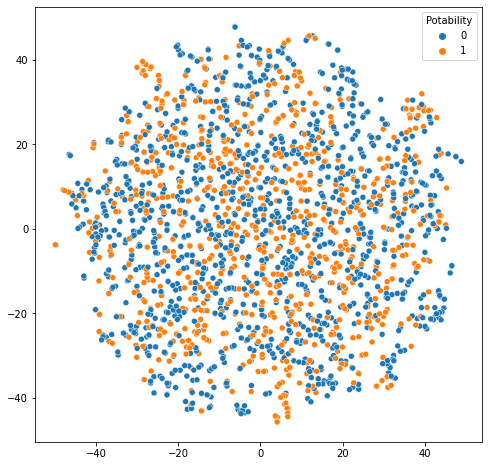

In [6]:
X_all_emb = TSNE().fit_transform(StandardScaler().fit_transform(X_all))
sns.scatterplot(X_all_emb[:,0], X_all_emb[:,1], hue= y)
plt.show()

## PCA

C:\Users\Mustapha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


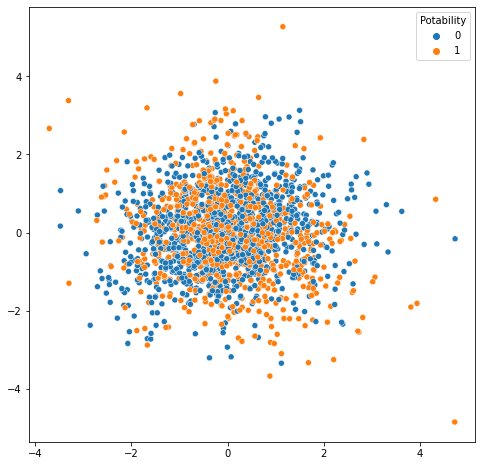

In [7]:
X_all_emb = PCA(n_components=2).fit_transform(StandardScaler().fit_transform(X_all))
sns.scatterplot(X_all_emb[:,0], X_all_emb[:,1], hue= y)
plt.show()

## LDA

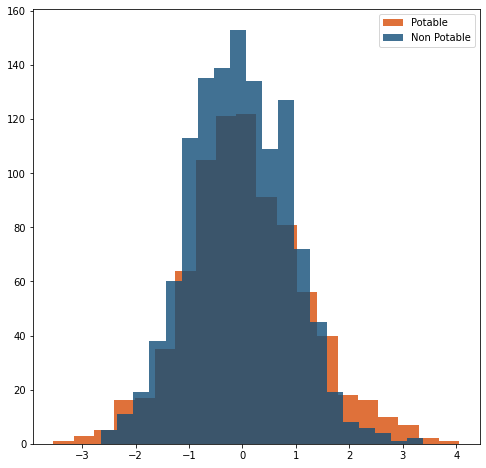

In [8]:
X_all_emb = LinearDiscriminantAnalysis(n_components=1).fit_transform(StandardScaler().fit_transform(X_all), y)

pos = X_all_emb[:,0][y==1]
neg = X_all_emb[:,0][y==0]

plt.hist(pos, bins = 20, color="#D74E09CC", label="Potable")

plt.hist(neg, bins = 20, color="#124E78CC", label="Non Potable")

plt.legend()

# sns.scatterplot(X_all_emb[:,0], range(len(X_all_emb[:,0])), hue= y)
# plt.xlabel("LDA comp")
# plt.ylabel("index")
plt.show()